## Windows Function

window function digunakan untuk melakukan perhitungan pada sekelompok baris terkait dengan baris saat ini tanpa menggabungkan baris ke dalam satu baris keluaran. Outpunya akan lebih dari satu baris hasil kueri saat ini, memberikan fleksibilitas tambahan dalam analisis data.

| Function   | Penjelasan                                                      |
|------------|-----------------------------------------------------------------|
| OVER       | Memungkinkan perhitungan atau analisis pada sekelompok baris terkait dengan baris saat ini menggunakan fungsi jendela. |
| PARTITION | Memisahkan hasil query menjadi kelompok-kelompok berdasarkan nilai tertentu, digunakan bersamaan dengan OVER untuk menerapkan fungsi jendela pada setiap kelompok terpisah. |
| ROW_NUMBER | Memberikan nomor baris unik untuk setiap baris hasil query.    |
| RANK       | Memberikan peringkat kepada setiap baris tanpa melewati peringkat jika ada nilai yang sama.     |
| DENSE_RANK | Memberikan peringkat kepada setiap baris tanpa melewati peringkat, bahkan jika ada nilai yang sama. |
| LAG        | Mengakses nilai dari baris sebelumnya dalam hasil query.       |
| LEAD       | Mengakses nilai dari baris setelahnya dalam hasil query.        |
| NTILE      | Membagi hasil query menjadi sejumlah "tangki" atau "bagian" sebanding. |


### Studi Kasus 1 : Menampilkan perhitungan maksimum dari setiap pembacaan data dari id yang lebih kecil ke yang lebih besar


```sql
SELECT
  id,
  duration_seconds,
  MAX(duration_seconds) OVER (ORDER BY id) AS max_duration
FROM dc_bikeshare_q1_2012;
```

Output:

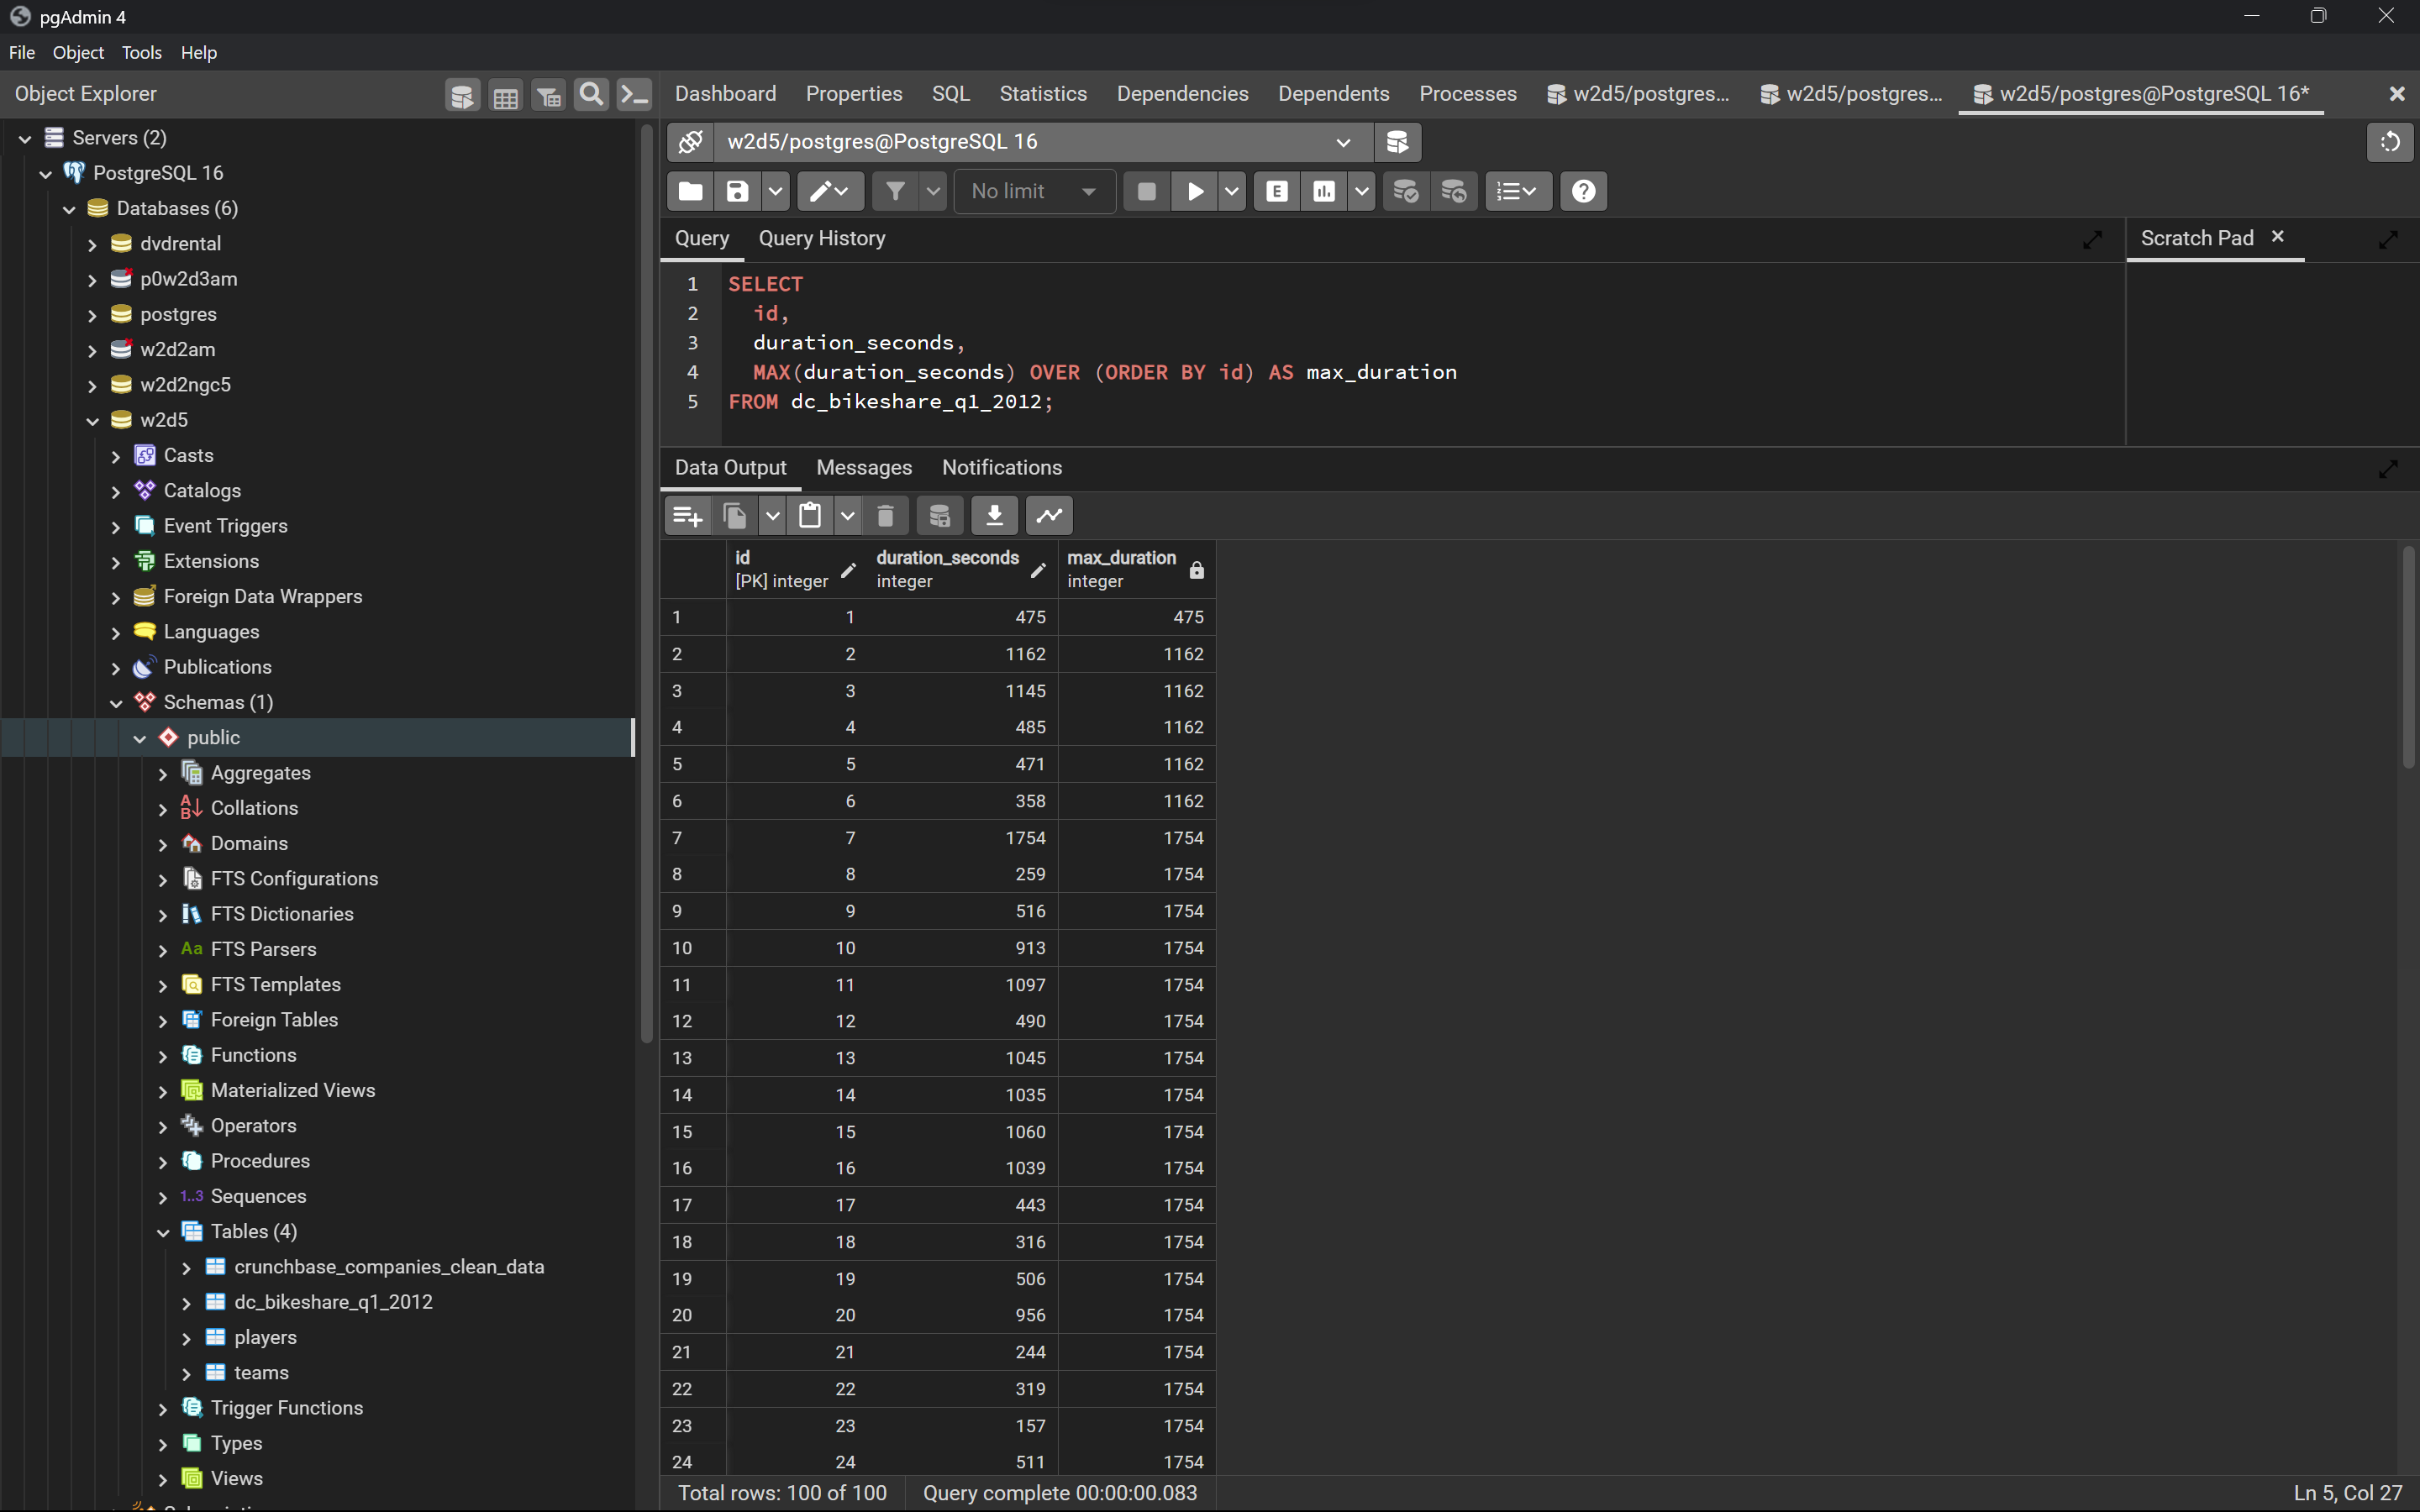

### Studi Kasus 2 : Menampilkan perhitungan total dari setiap pembacaan data dari start_terminal yang lebih kecil ke yang lebih besar.

> note : start_terminal tidak uniq seperti id, tampilkan start_terminal juga

```sql
SELECT
  id,
  start_terminal,
  duration_seconds,
  SUM(duration_seconds) OVER (ORDER BY start_terminal) AS sum_duration
FROM dc_bikeshare_q1_2012;
```

> Menampilkan perhitungan total dari setiap pembacaan data dari start_terminal yang lebih besar ke kecil dan tampilkan urutannya juga idnya.

```sql
SELECT
  id,
  start_terminal,
  duration_seconds,
  MAX(duration_seconds) OVER (ORDER BY start_terminal DESC) AS max_duration,
  ROW_NUMBER() OVER (ORDER BY start_terminal DESC) AS rn  -- row_number ini akan bisa berjalan kalau ada over, overnya disamakan dengan yang di atas; rownumber ini akan mengeluarkan iterasi ke berapa berdasarkan order by start_terminal
FROM dc_bikeshare_q1_2012;
```


```sql
SELECT
  id,
  start_terminal,
  duration_seconds,
  SUM(duration_seconds) OVER (ORDER BY start_terminal DESC) AS sum_duration
FROM dc_bikeshare_q1_2012;
-- hasil akhir 103866
```



Output Studi Kasus 2a:
  
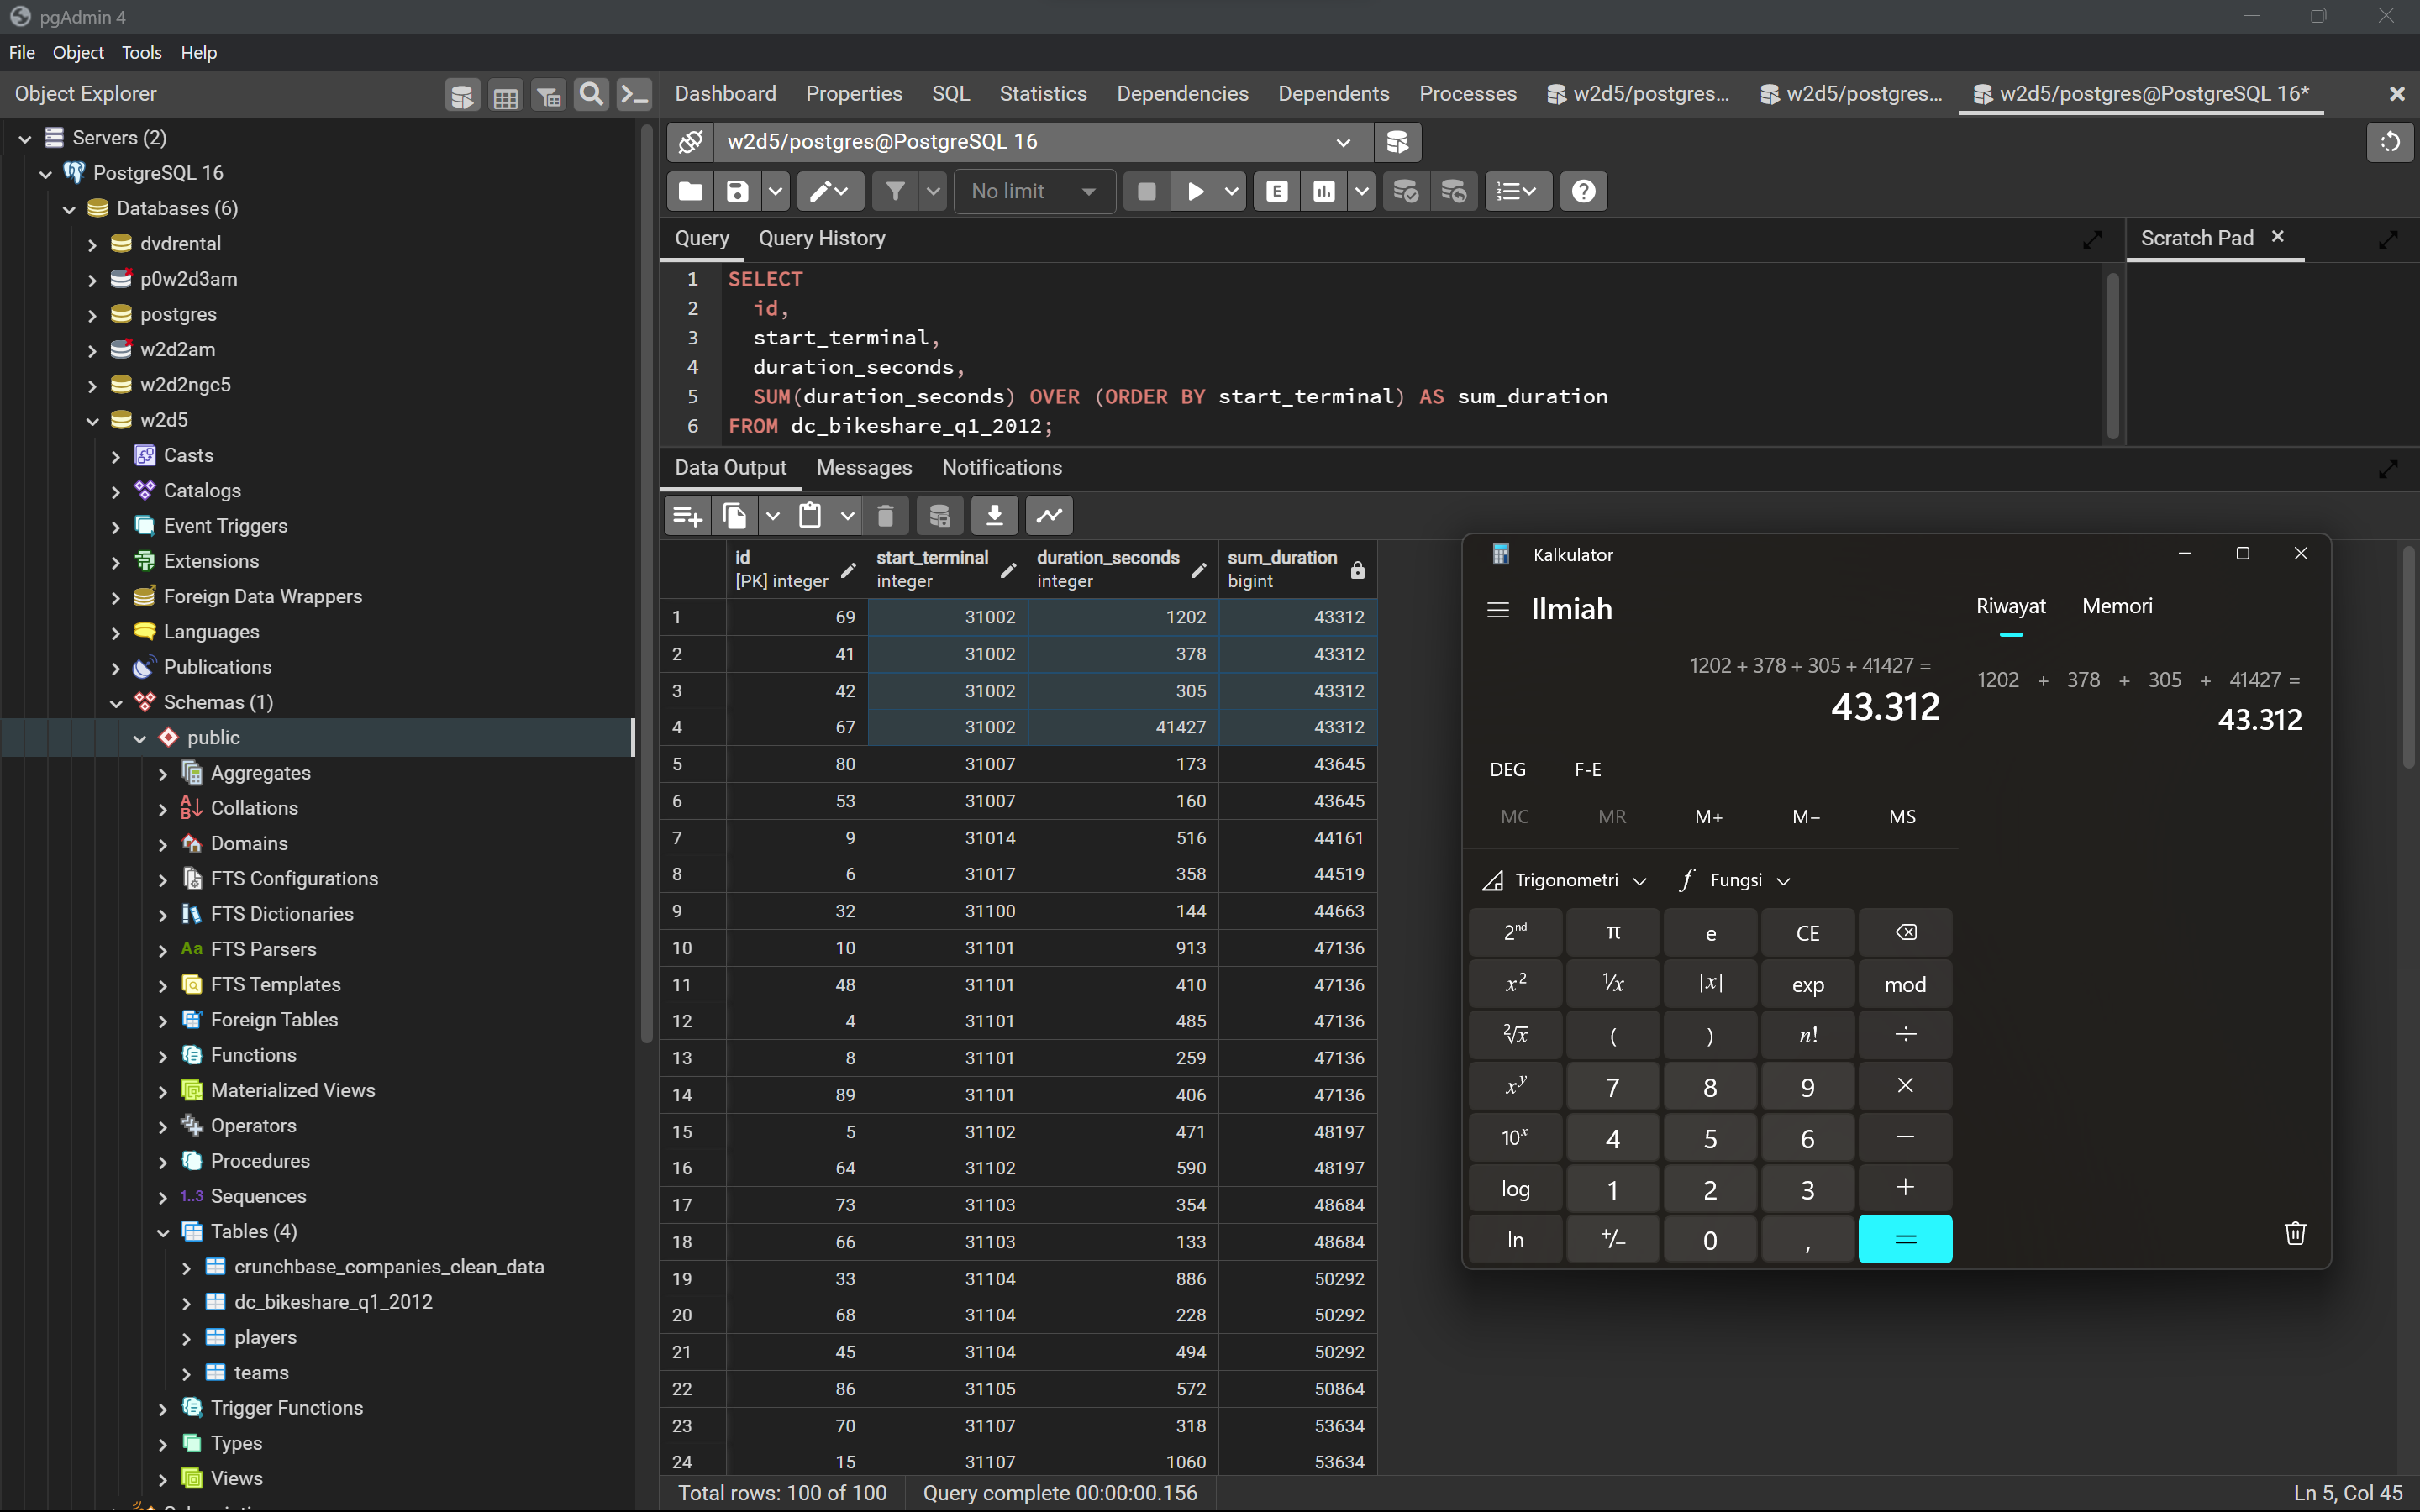  
  
Output Studi Kasus 2b:
  
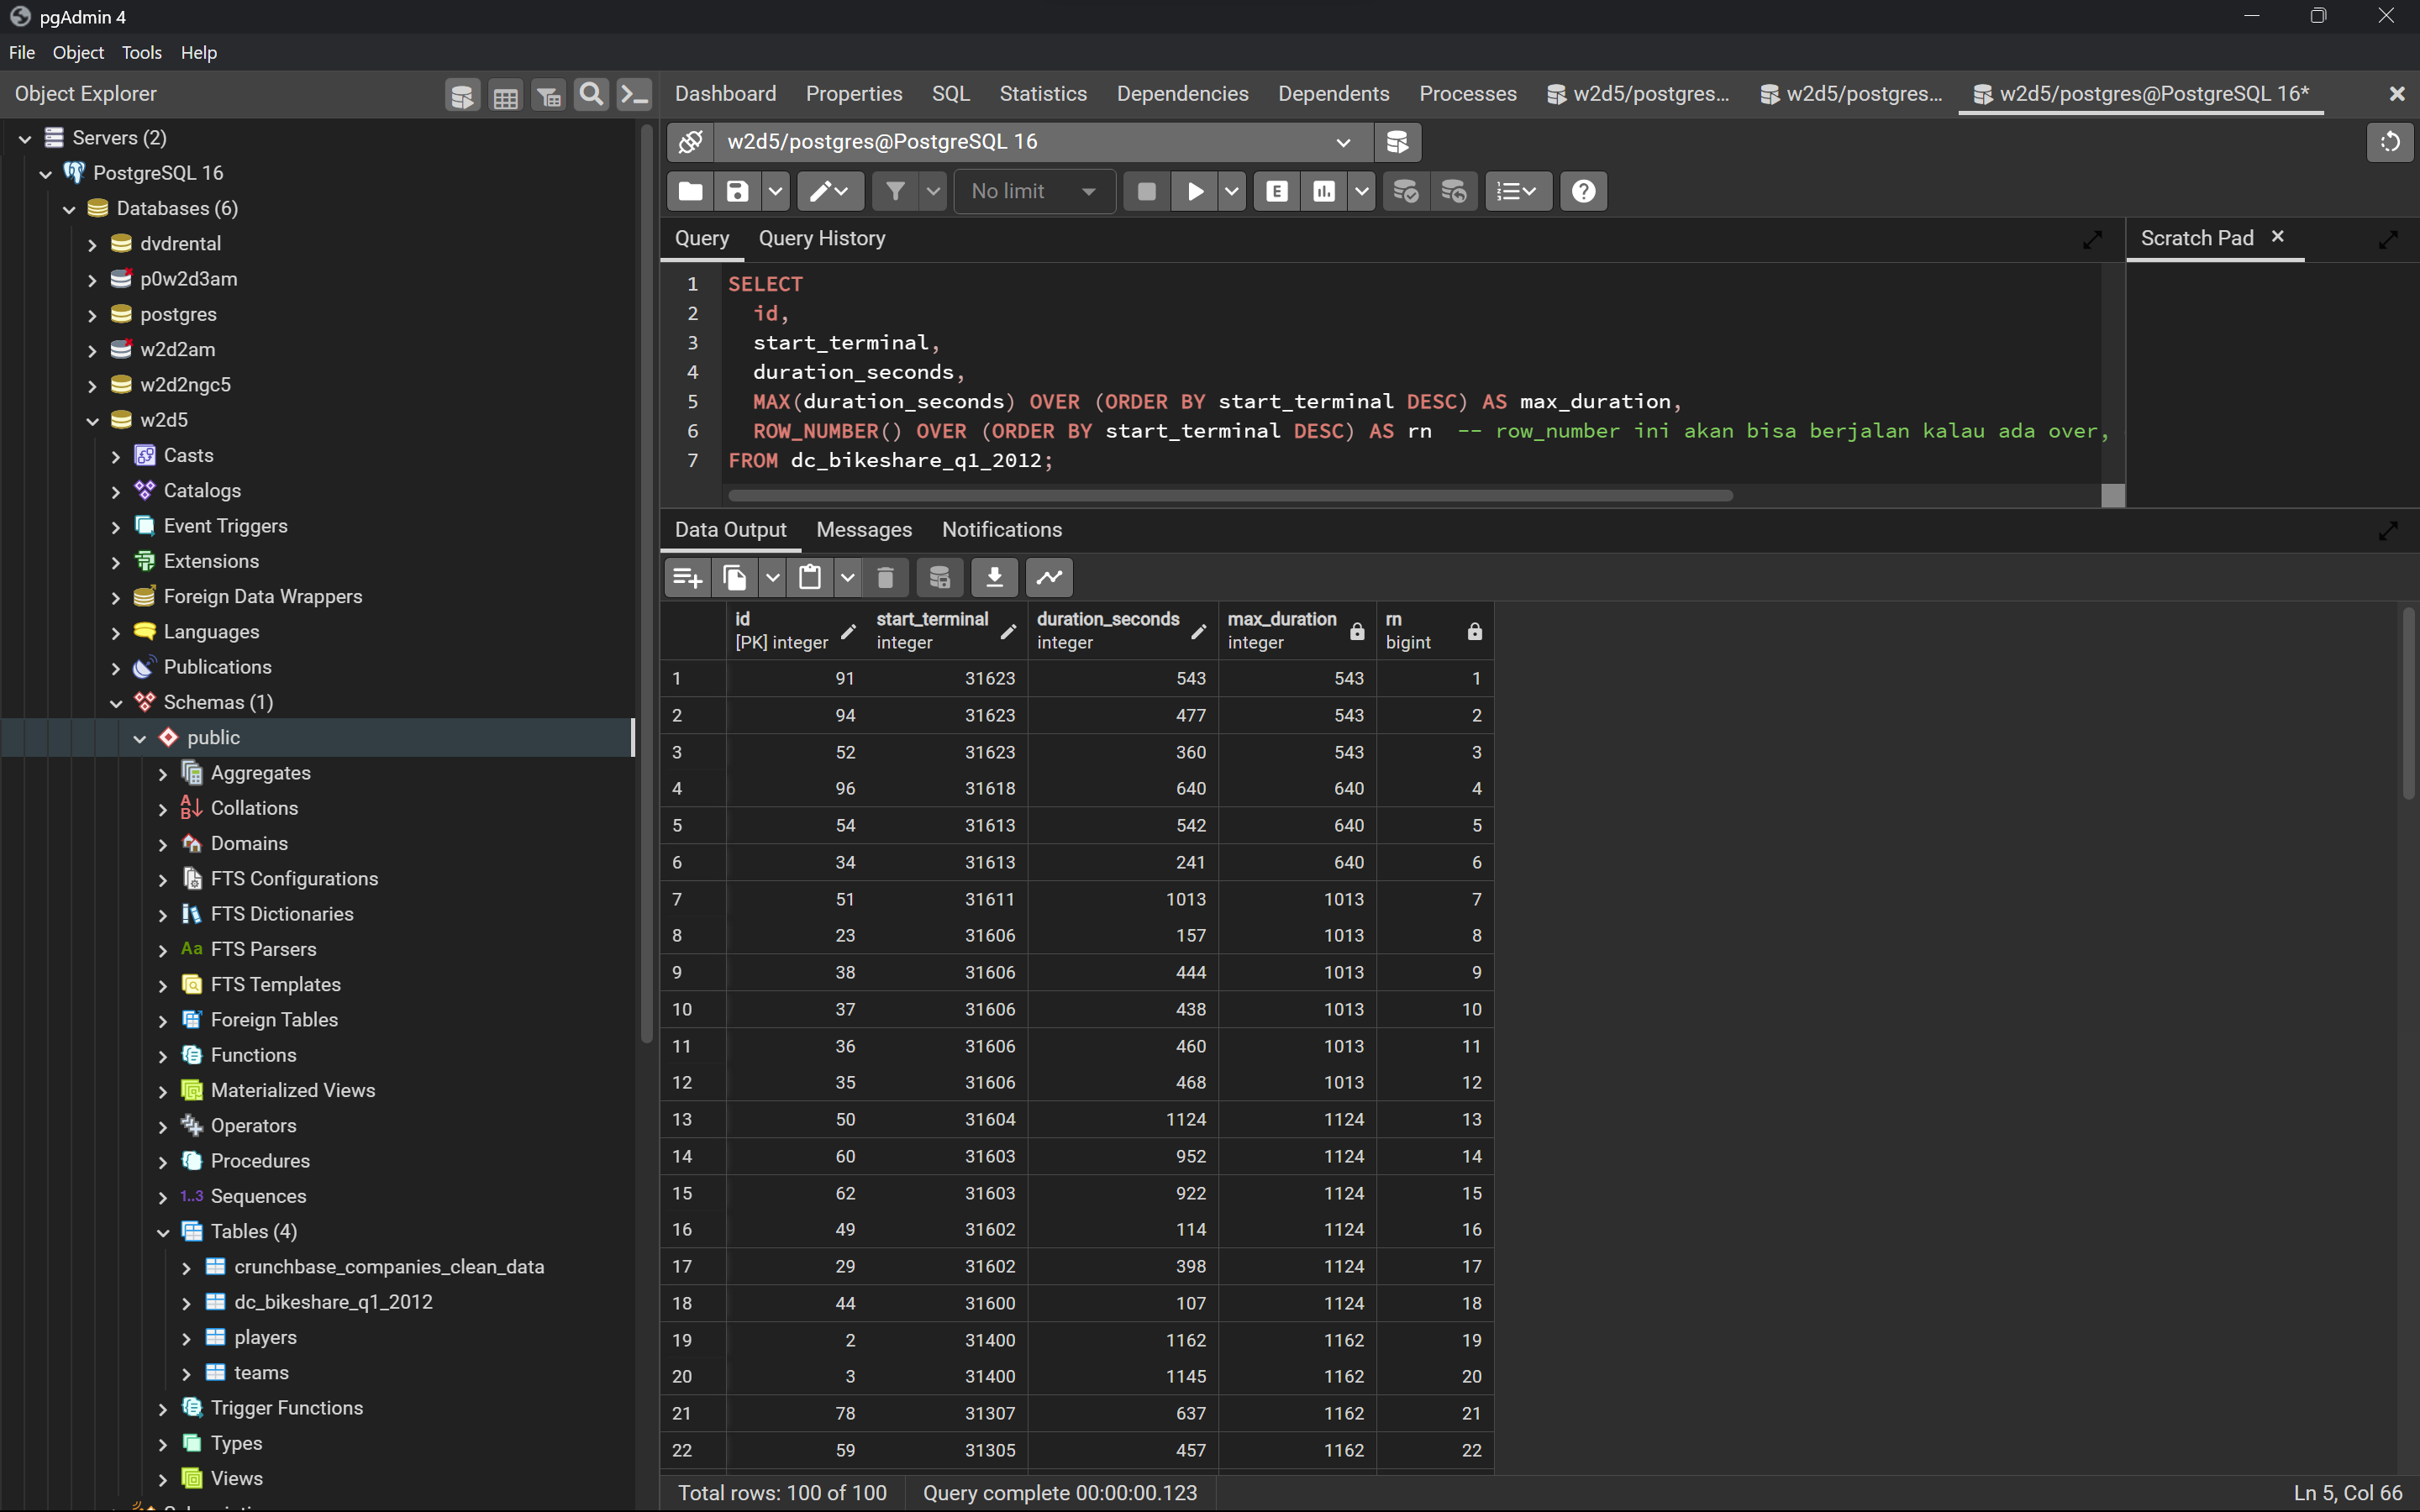  

Output Studi Kasus 2c:  
  
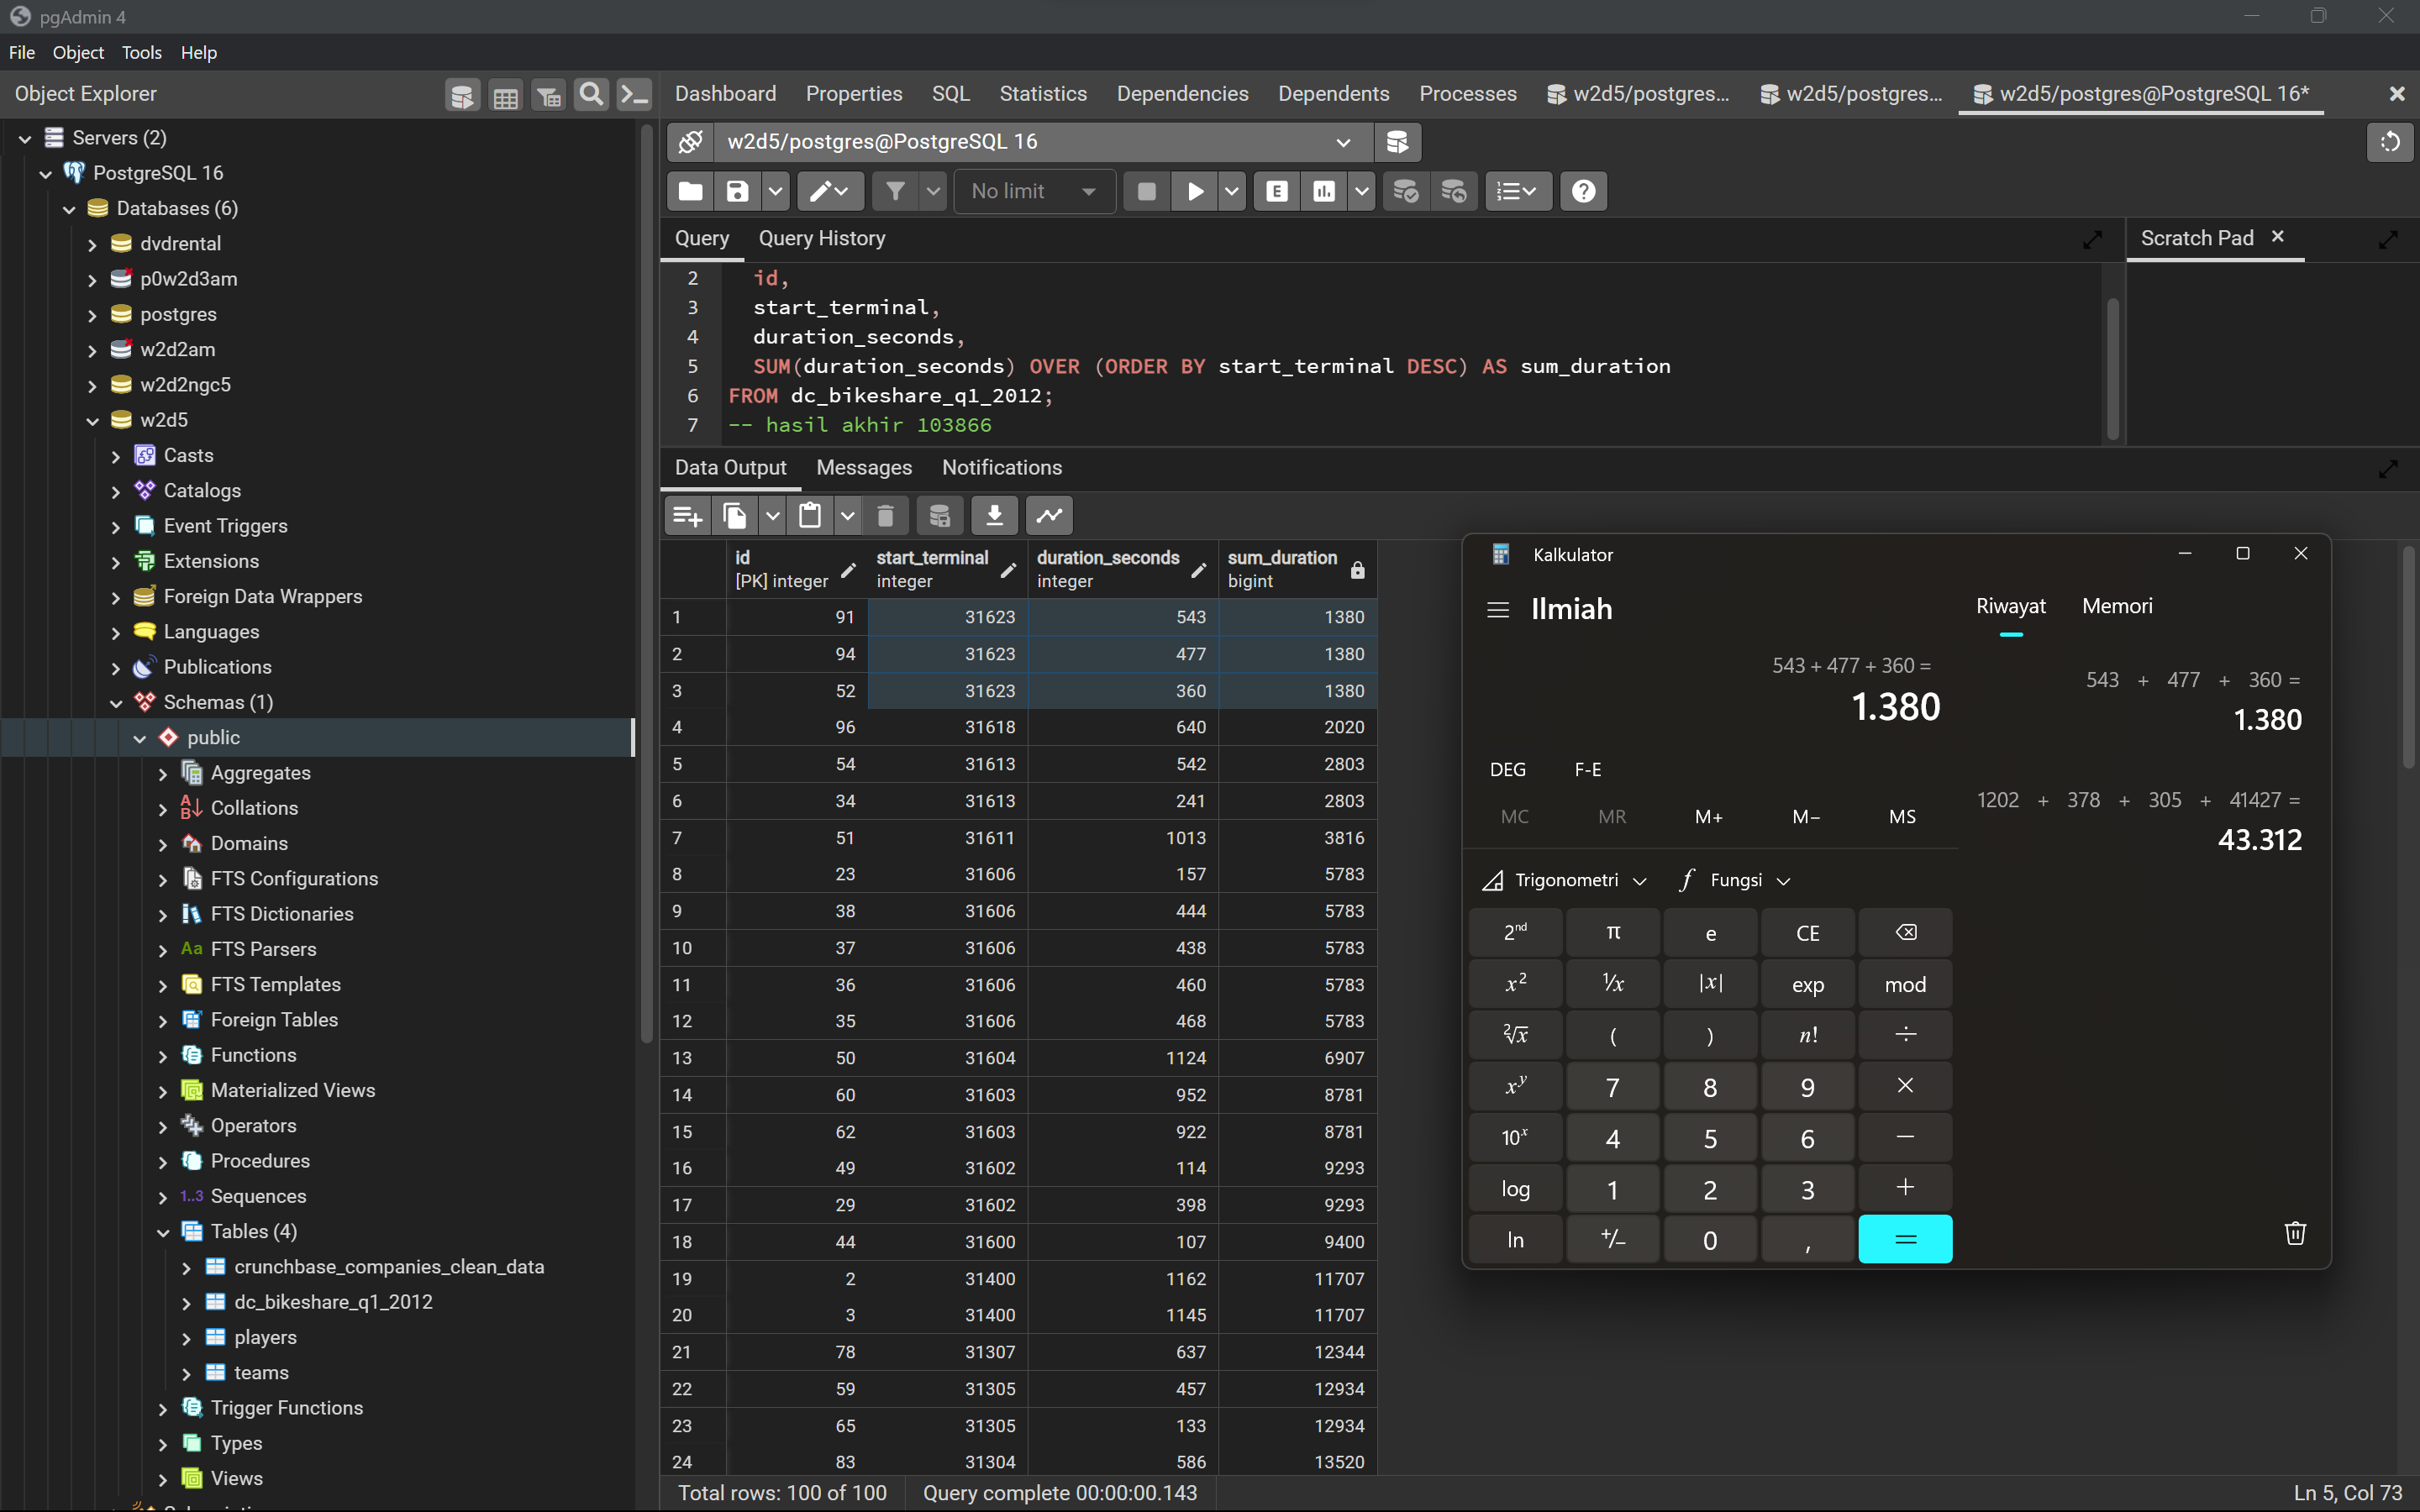

### Studi Kasus 3 :  LAG & LEAD



LAG & LEAD berguna untuk membandingkan baris dengan baris sebelumnya atau sesudahnya. namun implementasinya perlu memperhatikan column tertentu dan akan di skip berapa row.
seperti penulisan pada kode dibawah ini yang seperti ini  LAG(duration_seconds, 1) yang artinya `LAG(<column>, <mundur n>)`.


```sql
SELECT start_terminal,
       duration_seconds,
       LAG(duration_seconds, 1) OVER
         (ORDER BY duration_seconds) AS lag
  FROM dc_bikeshare_q1_2012
 WHERE start_time < '2012-01-08'

```

LAG  
  
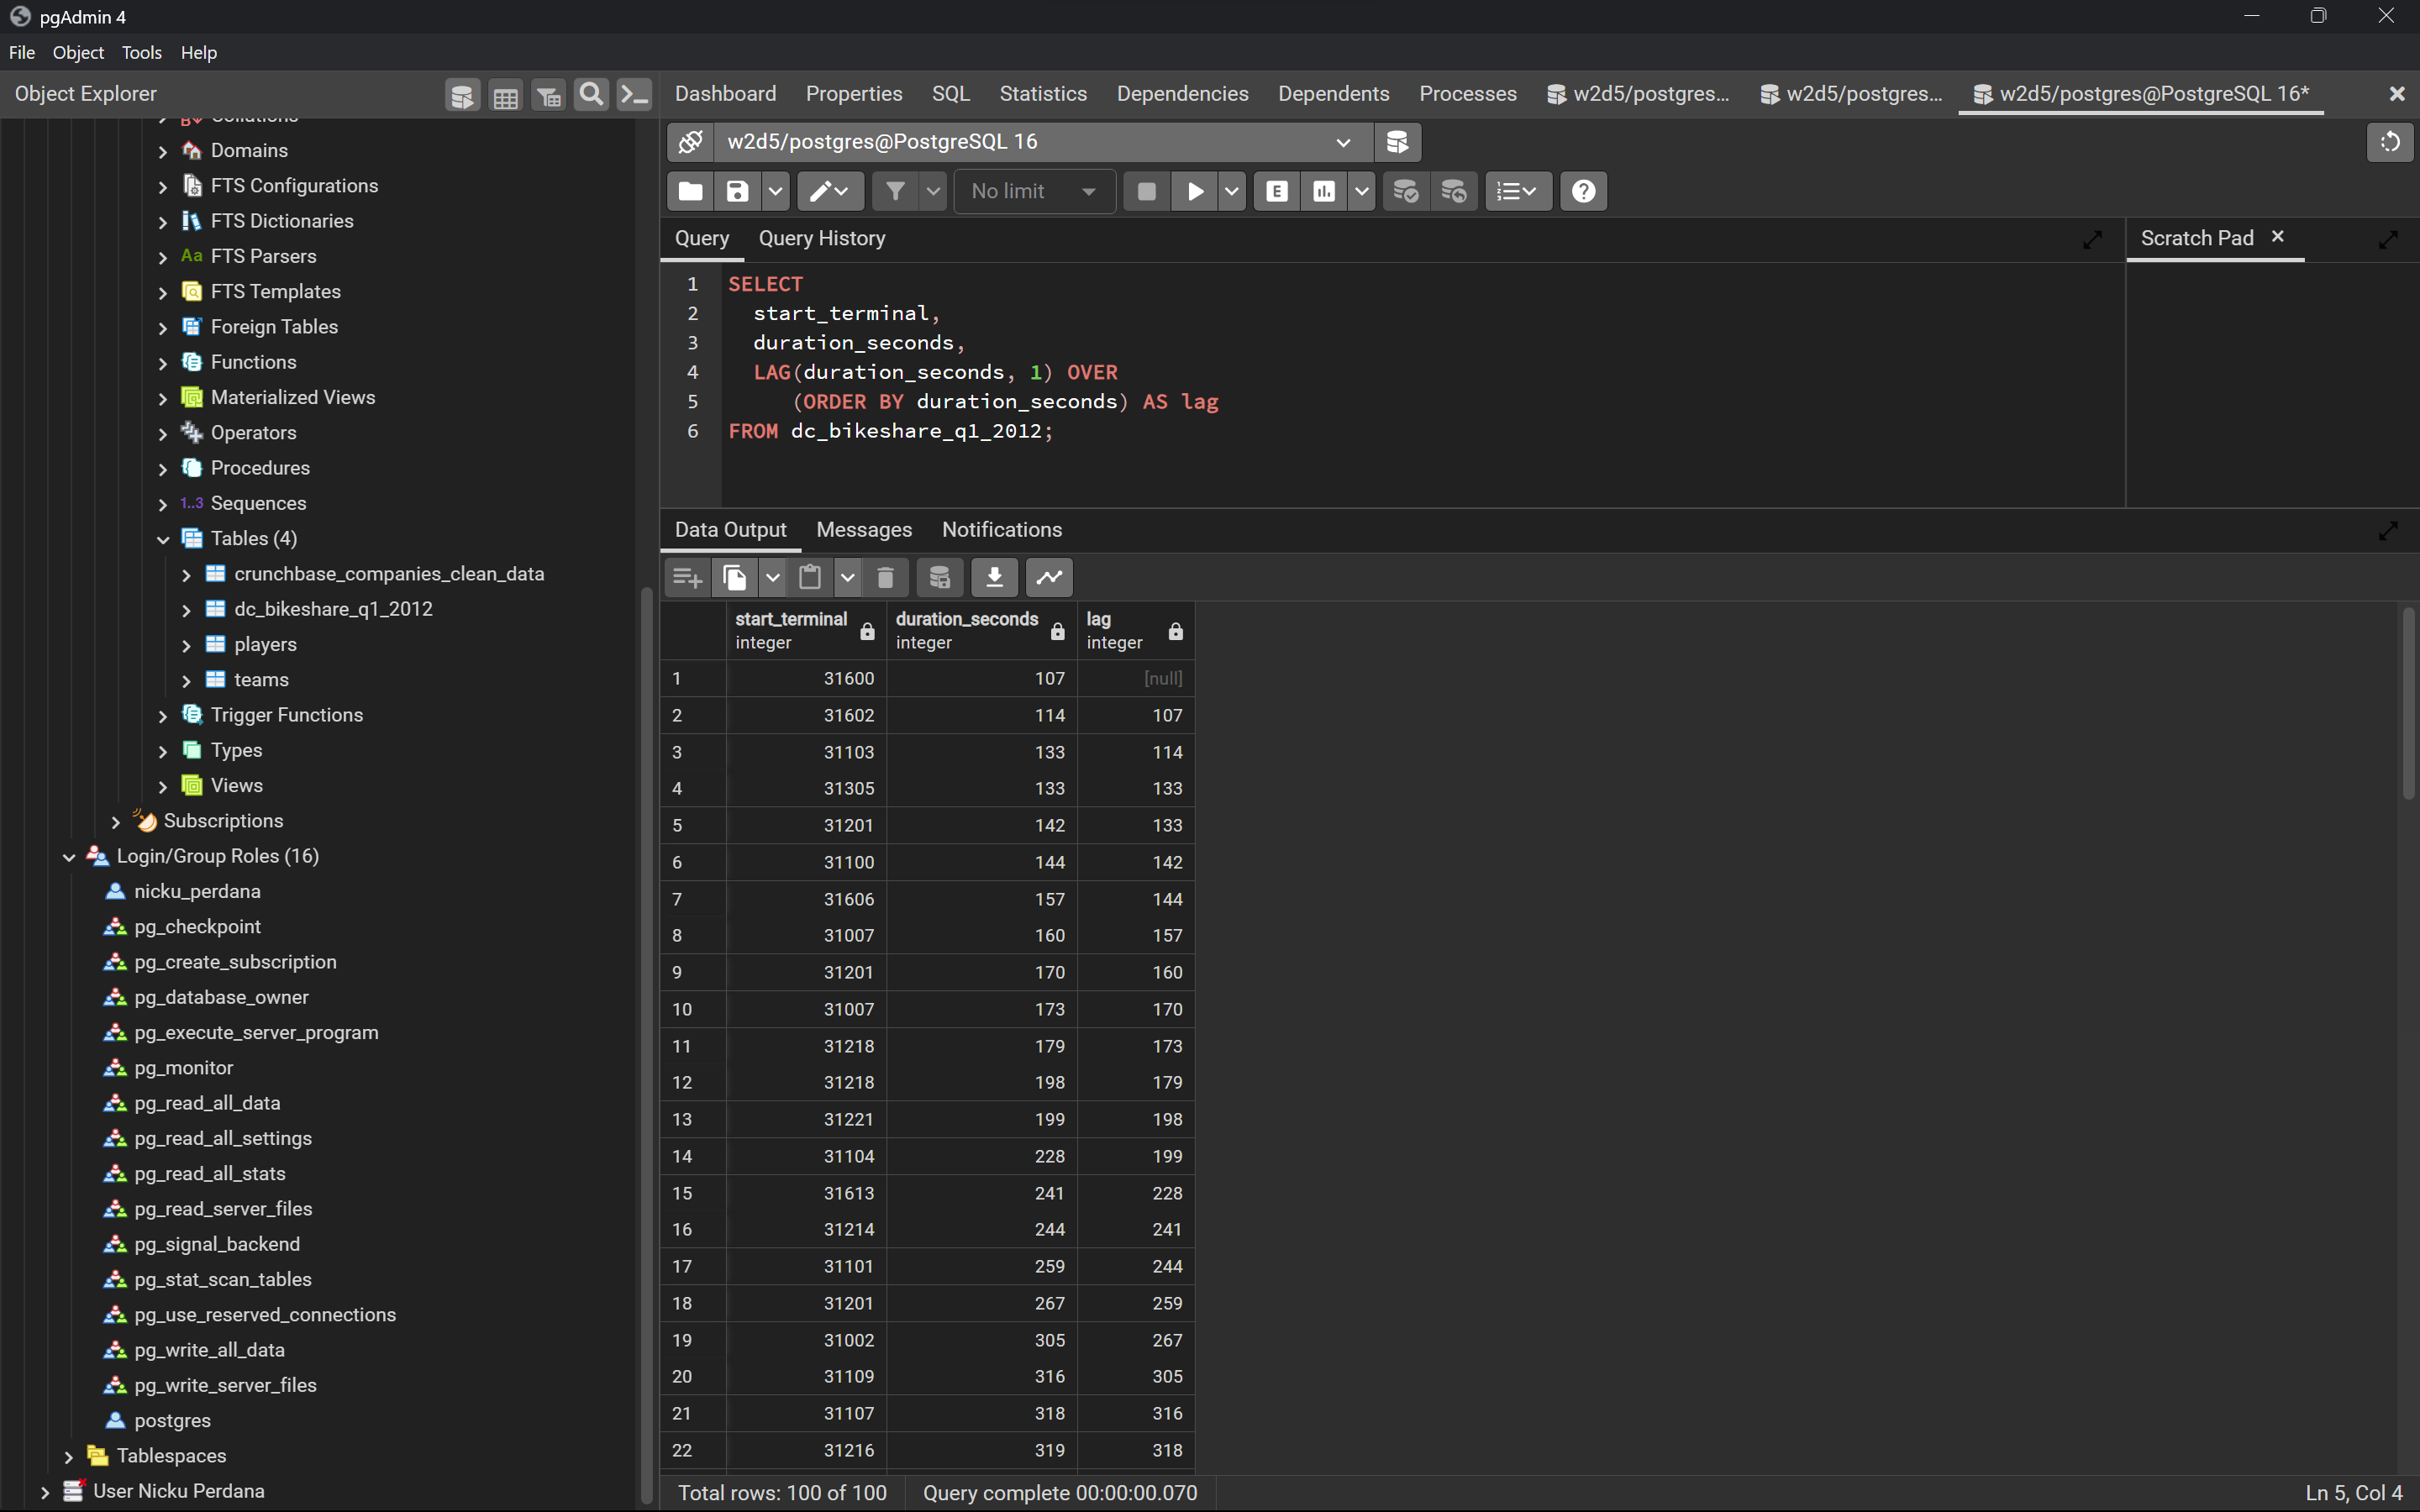

### Studi Kasus 4 :  PARTITION

Memisahkan hasil query menjadi kelompok-kelompok berdasarkan nilai tertentu, digunakan bersamaan dengan OVER untuk menerapkan fungsi jendela pada setiap kelompok terpisah.

```sql
SELECT start_terminal,
       duration_seconds,
       SUM(duration_seconds) OVER
         (PARTITION BY start_terminal) AS running_total
  FROM dc_bikeshare_q1_2012
 WHERE start_time < '2012-01-08'
 ```

Ntile:
  
```sql
SELECT start_terminal,
       duration_seconds,
       NTILE(4) OVER
	   (ORDER BY duration_seconds) as quartile
FROM dc_bikeshare_q1_2012
  

```

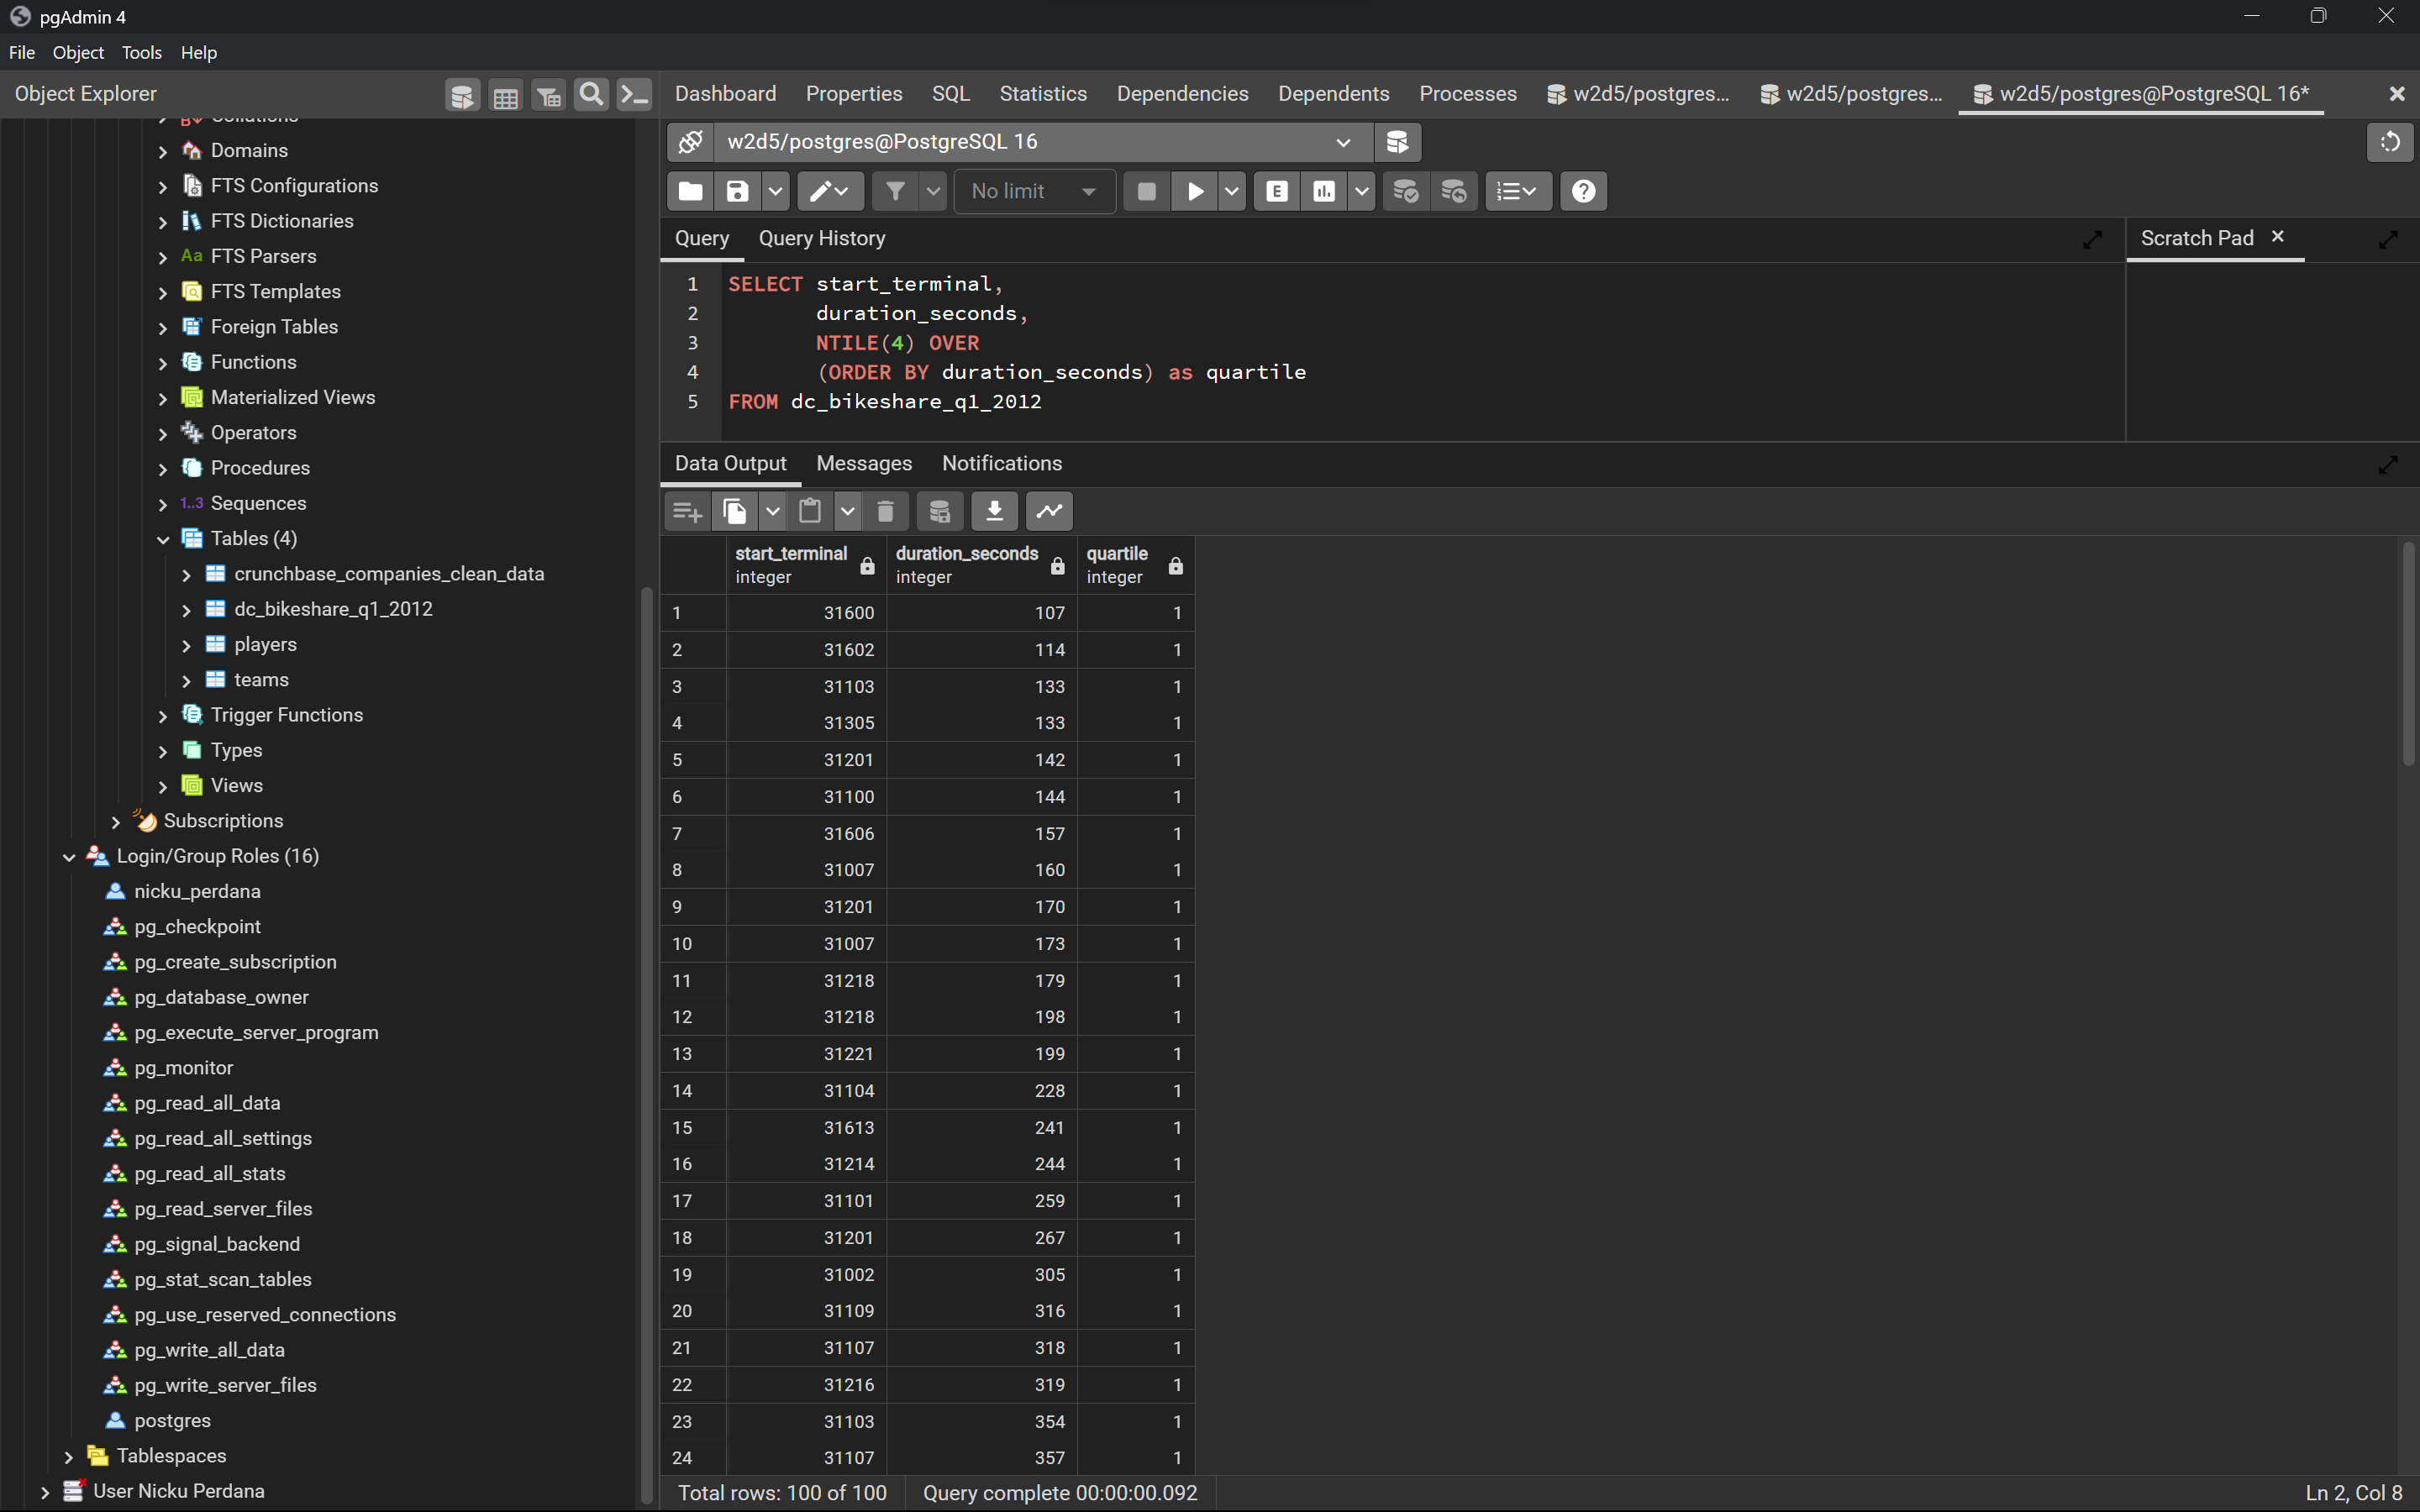